In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib  # For saving models
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid')

# Function to generate features from stock data
def feature_stock_data(file_path):
    data = pd.read_csv(file_path)
    newfeatures = pd.DataFrame()
    newfeatures['Target'] = data['Close'].rolling(window=2).apply(lambda x: x.iloc[1] > x.iloc[0])
    newfeatures['Target'].fillna(0, inplace=True)
    data = data.shift(1)
    data['Target'] = newfeatures['Target']
    print(data)
    return data.iloc[1:]

# Logistic Regression analysis and save model
def logistic_regression_analysis(data, save_path):
    predictors = ['Open', 'High', 'Low', 'Close', 'Volume']
    X_train, X_test, y_train, y_test = train_test_split(data[predictors], data['Target'], test_size=0.2, random_state=5)

    # Hyperparameter selection for Logistic Regression
    def select_hyperparameters_logistic_regression(X_train, y_train):
        model = LogisticRegression()
        space = {
            'solver': ['newton-cg', 'lbfgs', 'liblinear'],
            'penalty': ['none', 'l1', 'l2', 'elasticnet'],
            'C': loguniform(1e-5, 100)
        }
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
        result = search.fit(X_train, y_train)
        return result.best_params_

    # Logistic Regression with hyperparameters
    def logistic_regression_hyperparameter(X_train, y_train, X_test, y_test, params):
        model = LogisticRegression(C=params['C'], solver=params['solver'], penalty=params['penalty'])
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(pd.DataFrame(cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1']), annot=True, fmt='d', cmap="YlGnBu")
        plt.show()
        # Save model
        joblib.dump(model, save_path)
        print(f"Logistic Regression model saved to {save_path}")
        return accuracy_score(y_test, y_pred)

    best_params_lr = select_hyperparameters_logistic_regression(X_train, y_train)
    result_logistic = logistic_regression_hyperparameter(X_train, y_train, X_test, y_test, best_params_lr)
    print("Logistic Regression Accuracy (default predictors):", round(result_logistic * 100, 2), "%")

# Random Forest analysis and save model
def random_forest_analysis(data, save_path):
    predictors = ['Open', 'High', 'Low', 'Close', 'Volume']
    X_train, X_test, y_train, y_test = train_test_split(data[predictors], data['Target'], test_size=0.2, random_state=5)

    # Hyperparameter selection for Random Forest
    def select_hyperparameters_random_forest(X_train, y_train):
        model = RandomForestClassifier()
        space = {
            'n_estimators': [10, 100, 1000],
            'max_features': ['sqrt', 'log2']
        }
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
        result = search.fit(X_train, y_train)
        return result.best_params_

    # Random Forest with hyperparameters
    def random_forest_hyperparameter(X_train, y_train, X_test, y_test, params):
        model = RandomForestClassifier(n_estimators=params['n_estimators'], max_features=params['max_features'])
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(pd.DataFrame(cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1']), annot=True, fmt='d', cmap="YlGnBu")
        plt.show()
        # Save model
        joblib.dump(model, save_path)
        print(f"Random Forest model saved to {save_path}")
        return accuracy_score(y_test, y_pred)

    best_params_rf = select_hyperparameters_random_forest(X_train, y_train)
    result_random = random_forest_hyperparameter(X_train, y_train, X_test, y_test, best_params_rf)
    print("Random Forest Accuracy (default predictors):", round(result_random * 100, 2), "%")







In [2]:
data = feature_stock_data('../clean_data/clean_dataAAPL.csv')

                           Date        Open        High         Low  \
0                          None         NaN         NaN         NaN   
1     2016-01-04 00:00:00-05:00   23.240000   23.865109   23.101842   
2     2016-01-05 00:00:00-05:00   23.951175   23.973824   23.194704   
3     2016-01-06 00:00:00-05:00   22.775699   23.185645   22.619423   
4     2016-01-07 00:00:00-05:00   22.349904   22.678312   21.840304   
...                         ...         ...         ...         ...   
2238  2024-11-21 00:00:00-05:00  228.880005  230.160004  225.710007   
2239  2024-11-22 00:00:00-05:00  228.059998  230.720001  228.059998   
2240  2024-11-25 00:00:00-05:00  231.460007  233.250000  229.740005   
2241  2024-11-26 00:00:00-05:00  233.330002  235.570007  233.330002   
2242  2024-11-27 00:00:00-05:00  234.470001  235.690002  233.809998   

           Close       Volume  Target  
0            NaN          NaN     0.0  
1      23.860579  270597600.0     0.0  
2      23.262650  223164000

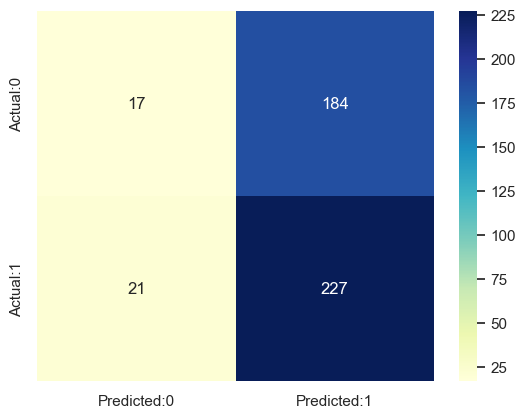

Logistic Regression model saved to logistic_regression_model.pkl
Logistic Regression Accuracy (default predictors): 54.34 %


In [3]:
logistic_regression_analysis(data, "logistic_regression_model.pkl")

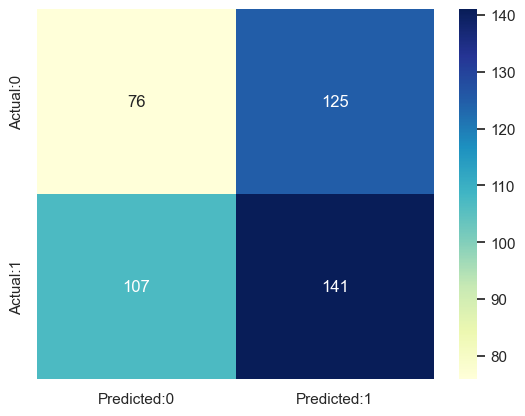

Random Forest model saved to random_forest_model.pkl
Random Forest Accuracy (default predictors): 48.33 %


In [3]:
random_forest_analysis(data, "random_forest_model.pkl")